In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.discrete as ds
import numpy as np
import scipy.fftpack as fftp
from ipywidgets import interactive, IntSlider, FloatSlider, HBox, VBox, Checkbox
from IPython.display import display, set_matplotlib_close

In [2]:
def square(N=8, width=0, offset=0, shift=0, center=True):
    npts = 32
    s = offset + (ds.Square(N, width) >> shift)
    n = np.arange(-npts, npts+1)
    plt.figure(figsize=(20, 7))
    plt.subplot(2, 2, (1, 2))
    plt.stem(n, s[-npts:npts+1], markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.axis([-npts-0.5, npts+0.5, -2.1, 2.1])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid(True)
    X = s.dfs()
    X.real[np.isclose(np.real(X), 0)] = 0
    X.imag[np.isclose(np.imag(X), 0)] = 0
    if center:
        X = fftp.fftshift(X)
        kidx = np.arange(-int(N/2), int((N-1)/2)+1)
    else:
        kidx = np.arange(0, N)
    plt.subplot(2, 2, 3)
    mX = np.abs(X)
    plt.stem(kidx, mX)
    min_ = min(0, np.min(mX))
    max_ = np.max(mX)
    dr = (max_ - min_)
    plt.axis([kidx[0]-0.5, kidx[-1]+0.5, min_-0.1*dr, max_+0.1*dr])
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid(True)
    plt.subplot(2, 2, 4)
    plt.stem(kidx, np.angle(X))
    plt.axis([kidx[0]-0.5, kidx[-1]+0.5, -np.pi-0.5, np.pi+0.5])
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid(True)

In [3]:
Nw = IntSlider(value=4, min=2, max=32, step=1, continuous_update=False)
ww = IntSlider(value=1, min=1, max=32, step=1, continuous_update=False)
ow = FloatSlider(value=0, min=-1.0, max=1.0, step=0.1, continuous_update=False)
sw = IntSlider(value=0, min=-64, max=64, step=1, continuous_update=False)
cw = Checkbox(value=True, description='DFS centrada')
vb1 = VBox(children=[Nw, ww])
vb2 = VBox(children=[ow, sw])
vb3 = VBox(children=[cw])
hb1 = HBox(children=[vb1, vb2, vb3])
w = interactive(square, N=Nw, width=ww, offset=ow, shift=sw, center=cw)

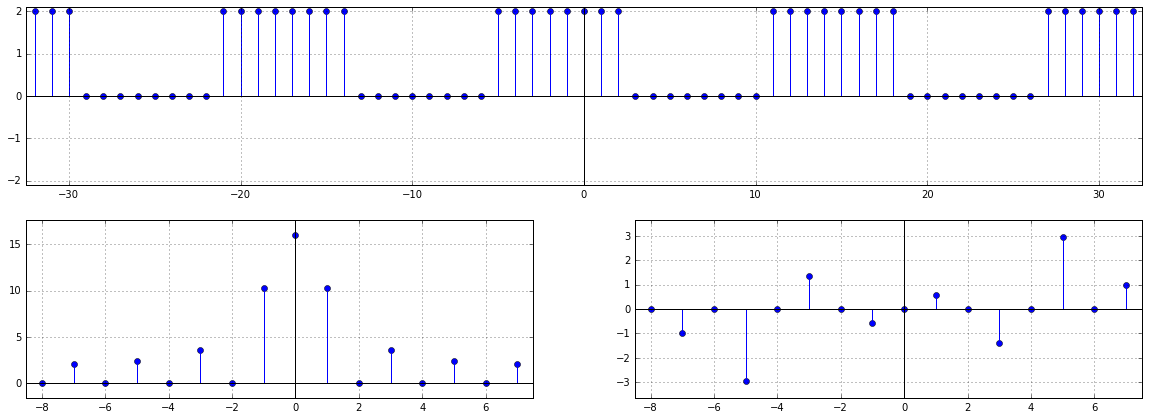

In [5]:
display(hb1)